In [6]:
import pandas as pd
from matplotlib import pyplot as plt


# Bai 1

In [4]:
df = pd.read_csv("titanic/train.csv")
print(df.head())
print(df.shape)
print(df.info())
print(df.isna().sum())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

# Bai 2

Số lượng hành khách theo giới tính:
Sex
male      577
female    314
Name: count, dtype: int64


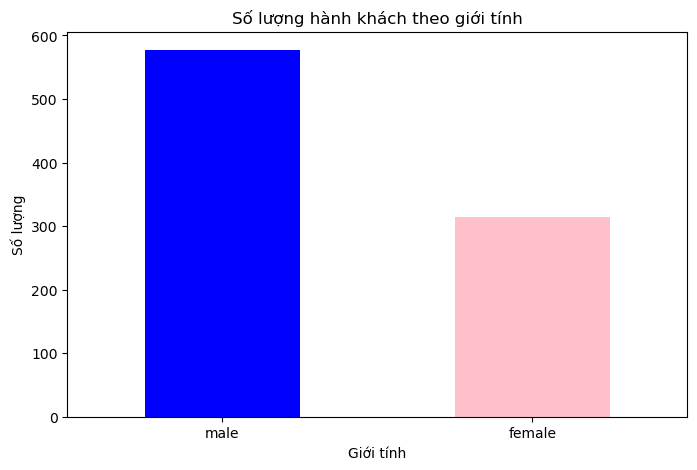


Số lượng hành khách theo hạng vé:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64


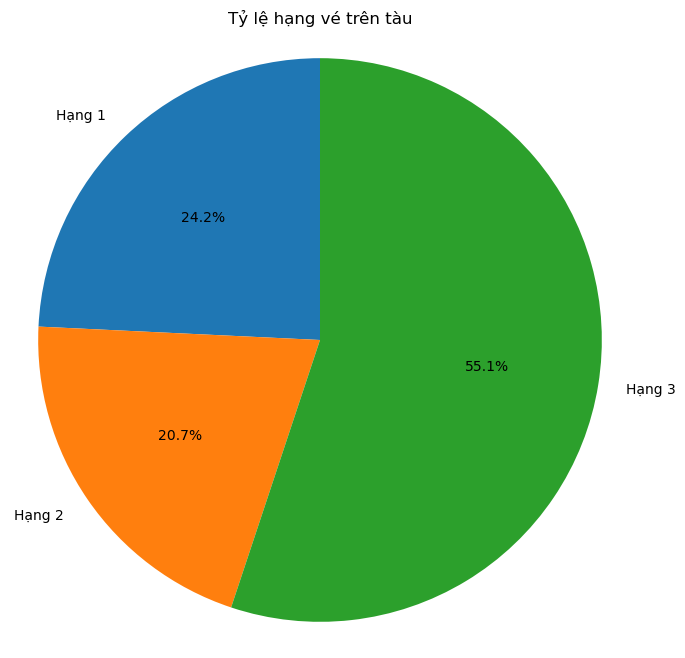

Số lượng hành khách mua vé hạng nhất tại Southampton: 127

Tuổi trung bình của tất cả hành khách: 29.70
Tuổi trung bình của những người sống sót: 28.34

Tỷ lệ sống sót theo giới tính:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Số lượng nữ sống sót có tuổi lớn hơn tuổi trung bình: 92


In [13]:
sex_counts = df['Sex'].value_counts()
print("Số lượng hành khách theo giới tính:")
print(sex_counts)

plt.figure(figsize=(8, 5))
sex_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Số lượng hành khách theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()


pclass_counts = df['Pclass'].value_counts().sort_index()
print("\nSố lượng hành khách theo hạng vé:")
print(pclass_counts)

plt.figure(figsize=(8, 8))
plt.pie(pclass_counts, labels=['Hạng 1', 'Hạng 2', 'Hạng 3'], autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ hạng vé trên tàu')
plt.axis('equal')
plt.show()

southampton_first_class = df[(df['Pclass'] == 1) & (df['Embarked'] == 'S')].shape[0]
print(f"Số lượng hành khách mua vé hạng nhất tại Southampton: {southampton_first_class}")


mean_age_all = df['Age'].mean()
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
print(f"\nTuổi trung bình của tất cả hành khách: {mean_age_all:.2f}")
print(f"Tuổi trung bình của những người sống sót: {mean_age_survived:.2f}")


survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("\nTỷ lệ sống sót theo giới tính:")
print(survival_by_sex)

# Số lượng nữ sống sót có tuổi lớn hơn tuổi trung bình của tất cả hành khách
female_survived_above_mean = df[(df['Sex'] == 'female') & 
                               (df['Survived'] == 1) & 
                               (df['Age'] > mean_age_all)].shape[0]
print(f"Số lượng nữ sống sót có tuổi lớn hơn tuổi trung bình: {female_survived_above_mean}")


# Bai 3

In [14]:
age_mean_pclass1 = df[df['Pclass'] == 1]['Age'].mean()
age_median_pclass23 = df[df['Pclass'].isin([2, 3])]['Age'].median()

df.loc[(df['Age'].isnull()) & (df['Pclass'] == 1), 'Age'] = age_mean_pclass1
df.loc[(df['Age'].isnull()) & (df['Pclass'].isin([2, 3])), 'Age'] = age_median_pclass23

print("Sau khi điền giá trị thiếu trong cột Age:")
print(df['Age'].isnull().sum(), "giá trị còn thiếu")


fare_mean = df['Fare'].mean()

df.loc[(df['Embarked'].isnull()) & (df['Fare'] > fare_mean), 'Embarked'] = 'C'  # Cherbourg
df.loc[(df['Embarked'].isnull()) & (df['Fare'] <= fare_mean), 'Embarked'] = 'S'  # Southampton

print("\nSau khi điền giá trị thiếu trong cột Embarked:")
print(df['Embarked'].isnull().sum(), "giá trị còn thiếu")



df = df.drop('Cabin', axis=1)
print("\nĐã xóa cột Cabin")


df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("\nĐã tạo cột FamilySize:")
print(df[['SibSp', 'Parch', 'FamilySize']].head())



df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
print("\nSau khi mã hóa cột Sex:")
print(df['Sex'].head())

Sau khi điền giá trị thiếu trong cột Age:
0 giá trị còn thiếu

Sau khi điền giá trị thiếu trong cột Embarked:
0 giá trị còn thiếu

Đã xóa cột Cabin

Đã tạo cột FamilySize:
   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1

Sau khi mã hóa cột Sex:
0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64


# Bai 4

In [17]:
fare_mean_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Giá vé trung bình theo hạng vé:")
print(fare_mean_by_pclass)

max_fare_passengers = df.loc[df.groupby('Pclass')['Fare'].idxmax()]
print("\nHành khách trả giá vé cao nhất theo hạng vé:")
print(max_fare_passengers[['Pclass', 'Name', 'Fare']])



age_bins = [0, 18, 35, 60, float('inf')]  # Các khoảng: 0-18, 19-35, 36-60, >60
age_labels = ['0-18', '19-35', '36-60', '>60']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

survival_by_age_group = df[df['Survived'] == 1].groupby('AgeGroup')['Survived'].count()
print("\nSố lượng hành khách sống sót theo nhóm tuổi:")
print(survival_by_age_group)



high_fare_df = df[df['Fare'] > 50]
high_fare_df.to_csv('titanic/high_fare_passengers.csv', index=False)
print("\nĐã lưu hành khách có Fare > 50 vào 'high_fare_passengers.csv'")
print("Số hành khách:", high_fare_df.shape[0])



summary_df = df.groupby(['Pclass', 'Survived']).size().unstack()
summary_df.columns = ['Not Survived', 'Survived']
summary_df.to_csv('titanic/summary.csv')
print("\nThống kê số lượng hành khách theo Pclass và Survived:")
print(summary_df)
print("Đã lưu vào 'summary.csv'")

Giá vé trung bình theo hạng vé:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Hành khách trả giá vé cao nhất theo hạng vé:
     Pclass                        Name      Fare
258       1            Ward, Miss. Anna  512.3292
72        2        Hood, Mr. Ambrose Jr   73.5000
159       3  Sage, Master. Thomas Henry   69.5500

Số lượng hành khách sống sót theo nhóm tuổi:
AgeGroup
0-18      61
19-35    173
36-60    101
>60        7
Name: Survived, dtype: int64

Đã lưu hành khách có Fare > 50 vào 'high_fare_passengers.csv'
Số hành khách: 160

Thống kê số lượng hành khách theo Pclass và Survived:
        Not Survived  Survived
Pclass                        
1                 80       136
2                 97        87
3                372       119
Đã lưu vào 'summary.csv'


C:\Users\manhv\AppData\Local\Temp\ipykernel_10352\905397945.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = df[df['Survived'] == 1].groupby('AgeGroup')['Survived'].count()
